In [31]:
# pip install fiftyone
# # 

In [32]:
import fiftyone as fo
import fiftyone.zoo as foz

# dataset = foz.load_zoo_dataset("quickstart")
# session = fo.launch_app(dataset)

In [23]:
# pip install umap-learn>=0.5

Note: you may need to restart the kernel to use updated packages.


In [24]:
# pip install torch

Note: you may need to restart the kernel to use updated packages.


In [25]:
# pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [39]:
import fiftyone as fo
import fiftyone.brain as fob
import fiftyone.zoo as foz
# dataset = foz.load_zoo_dataset("quickstart")
# Image embeddings
fob.compute_visualization(dataset, brain_key="img_viz")
# Object patch embeddings
fob.compute_visualization(
    dataset, patches_field="ground_truth", brain_key="gt_viz"
)


Computing embeddings...
 100% |███████████████| 1007/1007 [7.0m elapsed, 0s remaining, 11.8 samples/s]      
Generating visualization...
UMAP( verbose=True)
Wed Jan  8 10:52:31 2025 Construct fuzzy simplicial set


c:\Users\e0l07sq\Anaconda3\envs\osteo_gpu\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Wed Jan  8 10:52:31 2025 Finding Nearest Neighbors
Wed Jan  8 10:52:31 2025 Finished Nearest Neighbor Search
Wed Jan  8 10:52:31 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs


Epochs completed:  35%| ███▍       174/500 [00:00]

	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [00:00]

	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


Wed Jan  8 10:52:32 2025 Finished embedding
Computing patch embeddings...


ValueError: Sample field 'ground_truth' is not a (<class 'fiftyone.core.labels.Detection'>, <class 'fiftyone.core.labels.Detections'>, <class 'fiftyone.core.labels.Polyline'>, <class 'fiftyone.core.labels.Polylines'>) instance; found <class 'fiftyone.core.labels.Classification'>

In [34]:
# pip install fiftyone


In [35]:
# pip install torch torchvision


In [37]:

# Path to your folder with images (replace with your folder's path)
import fiftyone as fo
import fiftyone.zoo as foz
import torch
import torchvision.transforms as T
from torchvision.models import resnet50
import numpy as np
from tqdm import tqdm
import os

# Path to your folder with images (replace with your folder's path)
base_path = r"data\multi-class-knee-osteoporosis-x-ray-dataset\archive"

# Load the dataset from subfolders
dataset = fo.Dataset.from_dir(
    dataset_dir=base_path,
    dataset_type=fo.types.ImageClassificationDirectoryTree,
    name="image_classification_dataset"
)

# Display the dataset to ensure it's loaded correctly
session = fo.launch_app(dataset)

# Load a pre-trained ResNet50 model
model = resnet50(pretrained=True)
model.eval()

# Remove the final classification layer to use the embeddings
model = torch.nn.Sequential(*list(model.children())[:-1])

# Define the image transformation pipeline
transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to compute embeddings
def compute_embedding(filepath):
    image = T.functional.to_pil_image(fo.utils.cv.imread(filepath))
    input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        embedding = model(input_tensor)
    return embedding.squeeze().numpy()

# Generate embeddings for all samples
print("Generating embeddings...")
embeddings = []
for sample in tqdm(dataset):
    embedding = compute_embedding(sample.filepath)
    sample["embedding"] = embedding.tolist()  # Convert to list for JSON serialization
    embeddings.append(embedding)
    sample.save()

# Visualize embeddings in FiftyOne App
print("Visualizing embeddings...")
embeddings = np.vstack(embeddings)  # Stack all embeddings
plot = fo.plot_embeddings(
    dataset,
    embeddings=embeddings,
    labels=list(dataset.values("ground_truth.label")),
)

session.plots.attach(plot)

# Keep the app running
session.wait()


ValueError: Dataset name 'image_classification_dataset' is not available

In [3]:
# pip install fiftyone torch torchvision pillow tqdm


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import fiftyone as fo

# Check if the dataset already exists
if "image_classification_dataset" in fo.list_datasets():
    print("Deleting existing dataset...")
    fo.delete_dataset("image_classification_dataset")

Deleting existing dataset...


 100% |███████████████| 1007/1007 [265.9ms elapsed, 0s remaining, 3.8K samples/s]      



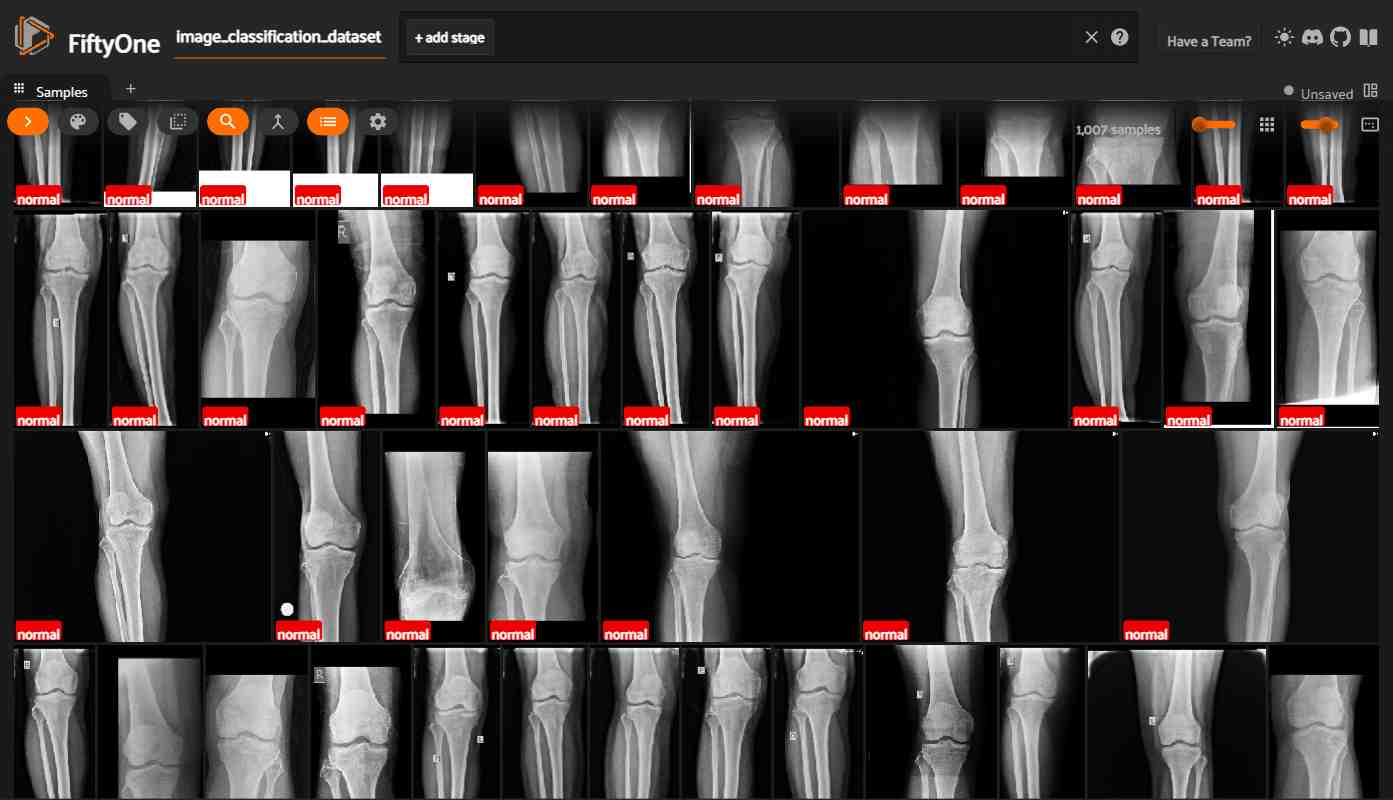

c:\Users\e0l07sq\Anaconda3\envs\osteo_gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\e0l07sq\Anaconda3\envs\osteo_gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Generating embeddings...


100%|██████████| 1007/1007 [02:29<00:00,  6.72it/s]

Visualizing embeddings...


AttributeError: module 'fiftyone' has no attribute 'plot_embeddings'

In [10]:
import fiftyone as fo
import fiftyone.zoo as foz
import torch
import torchvision.transforms as T
from torchvision.models import resnet50
from PIL import Image
import numpy as np
from tqdm import tqdm
import os

# Path to your folder with images (replace with your folder's path)
base_path = r"data\multi-class-knee-osteoporosis-x-ray-dataset\archive"

# Load the dataset from subfolders
dataset = fo.Dataset.from_dir(
    dataset_dir=base_path,
    dataset_type=fo.types.ImageClassificationDirectoryTree,
    name="image_classification_dataset"
)

# Display the dataset to ensure it's loaded correctly
session = fo.launch_app(dataset)

# Load a pre-trained ResNet50 model
model = resnet50(pretrained=True)
model.eval()

# Remove the final classification layer to use the embeddings
model = torch.nn.Sequential(*list(model.children())[:-1])

# Define the image transformation pipeline
transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to compute embeddings
def compute_embedding(filepath):
    # Load the image using Pillow
    image = Image.open(filepath).convert("RGB")
    input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        embedding = model(input_tensor)
    return embedding.squeeze().numpy()

# Generate embeddings for all samples
print("Generating embeddings...")
embeddings = []
for sample in tqdm(dataset):
    embedding = compute_embedding(sample.filepath)
    sample["embedding"] = embedding.tolist()  # Convert to list for JSON serialization
    embeddings.append(embedding)
    sample.save()

# Visualize embeddings in FiftyOne App
print("Visualizing embeddings...")
embeddings = np.vstack(embeddings)  # Stack all embeddings
plot = fo.plot_embeddings(
    dataset,
    embeddings=embeddings,
    labels=list(dataset.values("ground_truth.label")),
)

session.plots.attach(plot)

# Keep the app running
session.wait()


In [ ]:
pip install fiftyone torch torchvision scikit-learn pillow tqdm


Deleting existing dataset...
 100% |███████████████| 1007/1007 [266.6ms elapsed, 0s remaining, 3.8K samples/s]      



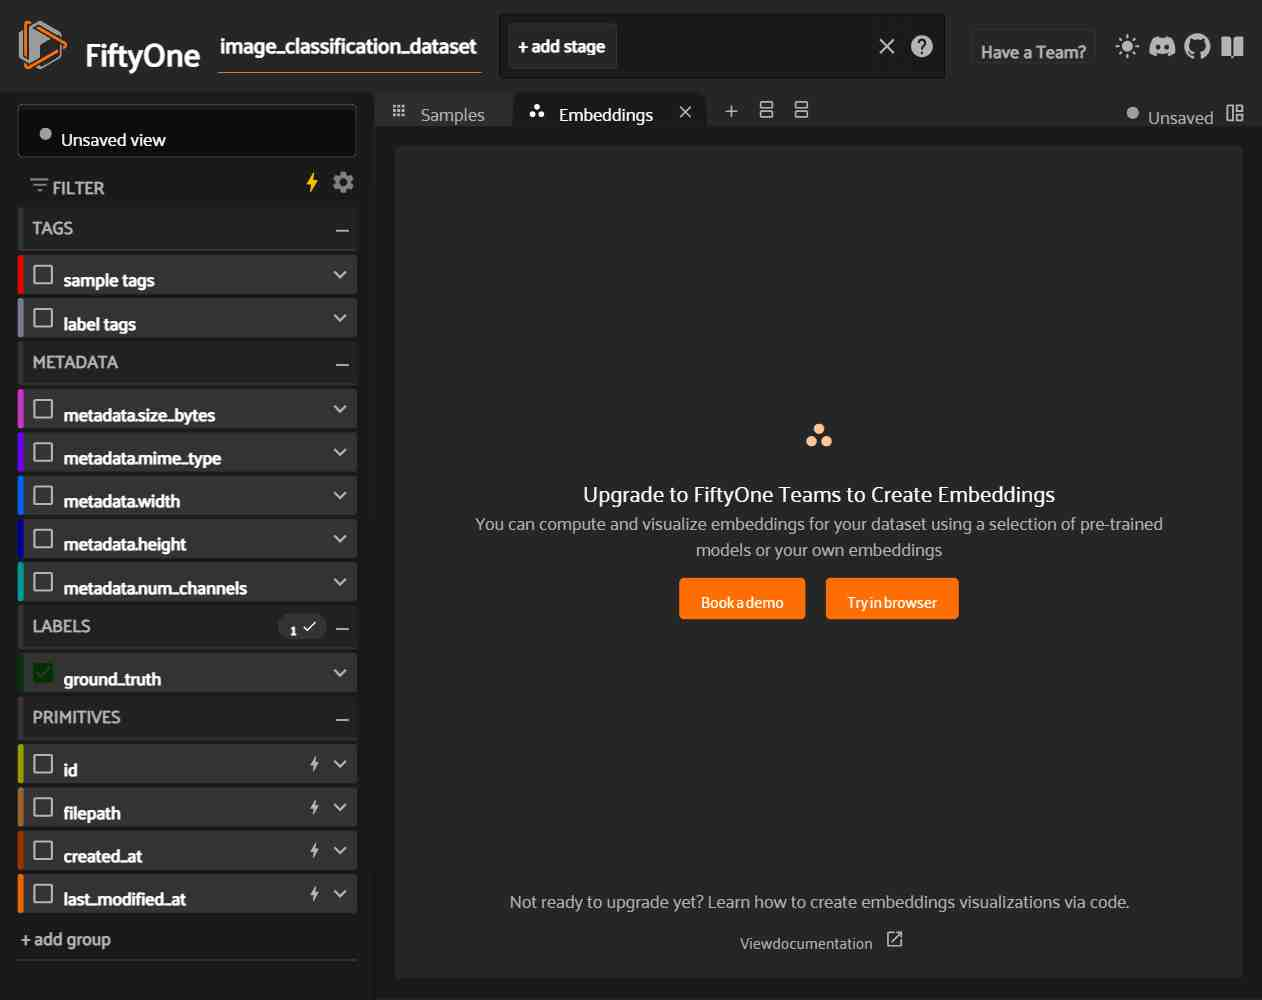

c:\Users\e0l07sq\Anaconda3\envs\osteo_gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\e0l07sq\Anaconda3\envs\osteo_gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Generating embeddings...


100%|██████████| 1007/1007 [02:02<00:00,  8.25it/s]


Performing t-SNE...



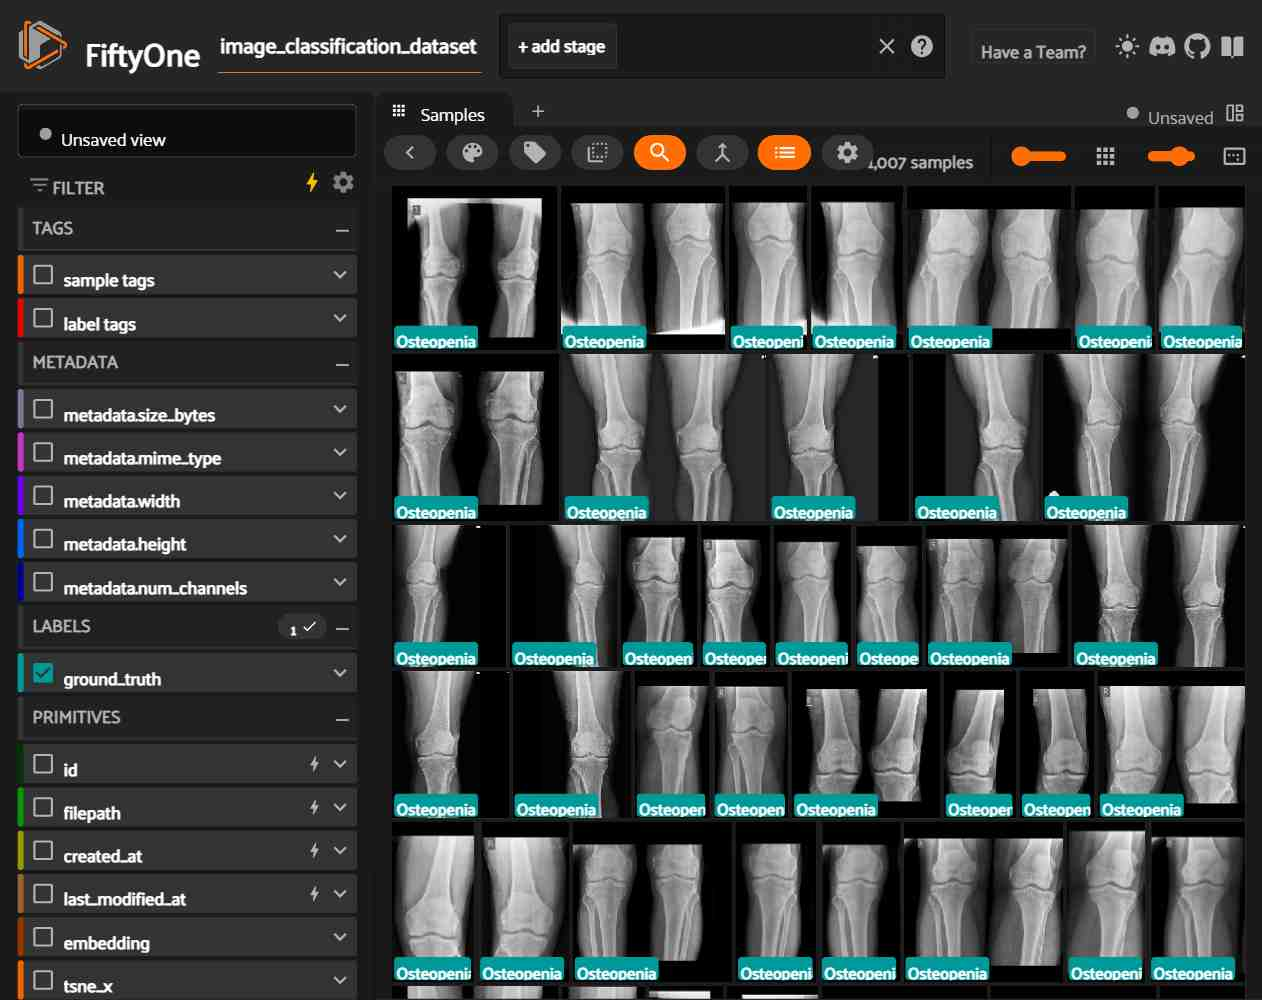

Notebook sessions cannot wait


In [38]:
import fiftyone as fo
import fiftyone.utils.data as foud
import torch
import torchvision.transforms as T
from torchvision.models import resnet50
from PIL import Image
import numpy as np
from tqdm import tqdm

# Path to your folder with images (replace with your folder's path)
base_path = r"data\multi-class-knee-osteoporosis-x-ray-dataset\archive"

# Delete existing dataset if it exists
if "image_classification_dataset" in fo.list_datasets():
    print("Deleting existing dataset...")
    fo.delete_dataset("image_classification_dataset")

# Load the dataset from subfolders
dataset = fo.Dataset.from_dir(
    dataset_dir=base_path,
    dataset_type=fo.types.ImageClassificationDirectoryTree,
    name="image_classification_dataset"
)

# Launch the FiftyOne App
session = fo.launch_app(dataset)

# Load a pre-trained ResNet50 model
model = resnet50(pretrained=True)
model.eval()

# Remove the final classification layer to use the embeddings
model = torch.nn.Sequential(*list(model.children())[:-1])

# Define the image transformation pipeline
transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to compute embeddings
def compute_embedding(filepath):
    # Load the image using Pillow
    image = Image.open(filepath).convert("RGB")
    input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        embedding = model(input_tensor)
    return embedding.squeeze().numpy()

# Generate embeddings for all samples
print("Generating embeddings...")
embeddings = []
for sample in tqdm(dataset):
    embedding = compute_embedding(sample.filepath)
    sample["embedding"] = embedding.tolist()  # Convert to list for JSON serialization
    embeddings.append(embedding)
    sample.save()

# Add embeddings to the dataset
embeddings = np.vstack(embeddings)  # Stack all embeddings into a 2D array
labels = list(dataset.values("ground_truth.label"))  # Get labels for all samples

# Apply dimensionality reduction (t-SNE) for visualization
from sklearn.manifold import TSNE

print("Performing t-SNE...")
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

# Add the reduced embeddings as sample fields
for sample, coords in zip(dataset, reduced_embeddings):
    sample["tsne_x"] = coords[0]
    sample["tsne_y"] = coords[1]
    sample.save()

# Visualize the embeddings in the FiftyOne App
session.dataset = dataset
session.view = dataset.sort_by("tsne_x")
session.wait()
